490612499_440132431


440132431

In [1]:
import random
import pandas as pd
import glob
import os
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from scipy.optimize import curve_fit

## PART 1

In [2]:
#Class for creating and moving person object
class Person:
    def __init__(self,xpos,ypos,healthy):
        self.xpos = xpos
        self.ypos = ypos
        #0 if healthy, 1 if infected
        self.healthy = healthy
    def get_xpos(self):
        return self.xpos
    def get_ypos(self):
        return self.ypos
    #Moving people around
    def move_x(self):
        self.xpos += np.random.randint(-1,2)
        if self.xpos == -1:
            self.xpos = sidelength - 1
        if self.xpos > sidelength:
            self.xpos = 0
    def move_y(self):
        self.ypos += np.random.randint(-1,2)
        if self.ypos == -1:
            self.ypos = sidelength - 1
        if self.ypos > sidelength:
            self.ypos = 0
    #Flag for infected
    def get_healthy(self):
        return self.healthy
    def is_infected(self):
        self.healthy = 1
#Creates scatterplot of persons
def scatter(list):
    sca_healthy_x = [] 
    sca_healthy_y = [] 
    sca_infected_x = [] 
    sca_infected_y = [] 
    for p in list: 
        if p.get_healthy() == 0:
            sca_healthy_x.append(p.get_xpos())
            sca_healthy_y.append(p.get_ypos())
        if p.get_healthy() == 1:
            sca_infected_x.append(p.get_xpos())
            sca_infected_y.append(p.get_ypos())
    plt.scatter(sca_healthy_x,sca_healthy_y,label="Healthy")
    plt.scatter(sca_infected_x,sca_infected_y,c='red',marker=".",label="Infected")
    plt.title("Scatterplot of healthy and infected persons")
    plt.legend()
    plt.show()  

In [3]:
#Starting Values
nexp = 10
maxtime = 1000
npeople = 100
ninfected = 1

In [4]:
def infect_simulation():
    #Initial Position of people
    infection_times = []
    plist = []
    testinfected = ninfected
    for i in range(npeople):
        x = np.random.randint(0,sidelength)
        y = np.random.randint(0,sidelength)
        if (testinfected > 0):
            i = Person(x,y,1)
            testinfected -= 1
        else:
            i = Person(x,y,0)
        plist.append(i)
    scatter(plist)
    cexp = 0
    big_list = []
    #Outer experiment loop
    while cexp < nexp:
        plist = []
        testinfected = ninfected
        for p in range(npeople):
            x = np.random.randint(0,sidelength)
            y = np.random.randint(0,sidelength)
            if (testinfected > 0):
                p = Person(x,y,1)
                testinfected -= 1
            else:
                p = Person(x,y,0)
            plist.append(p)    
        infect_time = []
        ctime = 0
        count = ninfected
        #Inner infection time loop
        while ctime <= maxtime:
            sick = []
            tcount = 0
            for peo in plist:
                peo.move_x()
                peo.move_y()
                if peo.get_healthy() == 1:
                    sick.append(tuple([peo.get_xpos(),peo.get_ypos()]))
            for hpeo in plist:
                if hpeo.get_healthy() == 0:
                    for s in sick: 
                        if hpeo.get_xpos() == s[0] and hpeo.get_ypos() == s[1]:
                            count += 1
                            hpeo.is_infected()
            if count == npeople:
                infection_times.append(ctime)
            for c in plist:
                if c.get_healthy() == 1:
                    tcount += 1
            infect_time.append(tcount)
            ctime+=1
        big_list.append(infect_time)
        cexp += 1
    #Mean and standard error until all infected
    mean_infect_t = np.mean(infection_times)
    std_infect_t = np.std(infection_times)
    print("Average time of all infected: {:.2f}".format(mean_infect_t))
    print("With uncertainty of: {:.2f}".format(std_infect_t))
    #Average infection Rate
    s = (len(big_list),len(big_list[0]))
    vec = np.ones(s)
    for i in range(len(vec)):
        vec[i] = vec[i]*big_list[i]
    test = np.mean(vec,axis=0)
    time_range = np.arange(0,len(test),1)
    plt.plot(time_range,test)
    plt.title("Infection rates over specified time with sidelength {}".format(sidelength))
    plt.ylabel("Number Infected")
    plt.xlabel("Time")
    plt.show()

1.1 and 1.2

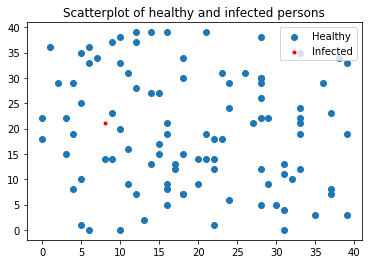

Average time of all infected: 569.97
With uncertainty of: 236.58


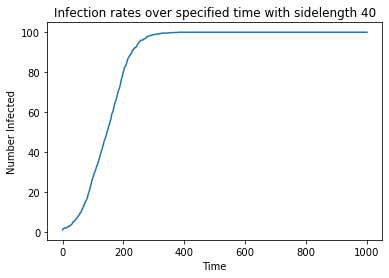

In [5]:
sidelength = 40
infect_simulation()

1.3

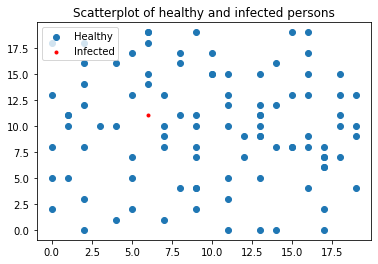

Average time of all infected: 59.83
With uncertainty of: 2.54


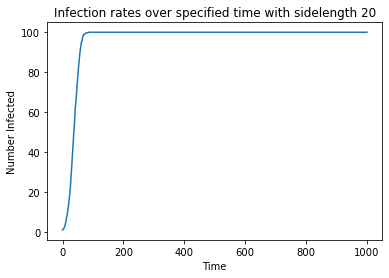

In [6]:
sidelength = 20
infect_simulation()


With a smaller world size the infection rate is ten times faster. Implying that spreading of infection rate grows exponentially in more confined areas.

In [7]:
#Animal example using Dogs and Rats
class Animal:
    def __init__(self,xpos,ypos,species,another,remove):
        self.xpos = xpos
        self.ypos = ypos
        self.species = species
        self.remove = remove
        self.another = another
    def get_xpos(self):
        return self.xpos
    def get_ypos(self):
        return self.ypos
    
    def move_x(self):
        self.xpos += np.random.randint(-3,4)
        if self.xpos == -1:
            self.xpos = sidelength - 1
        if self.xpos > sidelength:
            self.xpos = 0
    def move_y(self):
        self.ypos += np.random.randint(-3,4)
        if self.ypos == -1:
            self.ypos = sidelength - 1
        if self.ypos > sidelength:
            self.ypos = 0
    def get_species(self):
        return self.species
    def get_another(self):
        return self.another
    def get_remove(self):
        return self.remove
    #Flags for add/remove animal
    def mark_remove(self):
        self.remove = 1
    def add_another(self):
        self.another += 1
    def reset_another(self):
        self.another = 0
def animal_scatter(list):
    dog_x = [] 
    dog_y = [] 
    rat_x = [] 
    rat_y = [] 
    for p in list: 
        if p.get_species() == "Dog":
            dog_x.append(p.get_xpos())
            dog_y.append(p.get_ypos())
        if p.get_species() == "Rat":
            rat_x.append(p.get_xpos())
            rat_y.append(p.get_ypos())
    plt.scatter(dog_x,dog_y,label="Dogs")
    plt.scatter(rat_x,rat_y,c='r',label="Rats",marker=".")
    plt.legend()
    plt.show()    

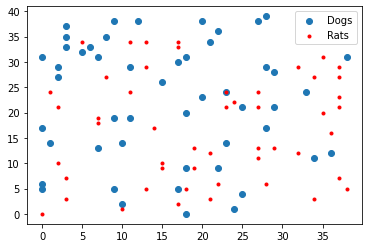

In [8]:
#Example of creating animal objects and their positions
sidelength = 40
n_rats = 50
n_dogs = 50
animal_list = []
big_rat_list = []
big_dog_list = []
for i in range(n_rats):
    x = np.random.randint(0,sidelength)
    y = np.random.randint(0,sidelength)
    i = Animal(x,y,"Rat",0,0)
    animal_list.append(i)
for i in range(n_dogs):
    x = np.random.randint(0,sidelength)
    y = np.random.randint(0,sidelength)
    i = Animal(x,y,"Dog",0,0)
    animal_list.append(i)
animal_scatter(animal_list)

In [9]:
def animal_simulation(d_another,r_another,d_remove,r_remove,n_rats,n_dogs,step):
    bigger_rat_list = []
    bigger_dog_list = []
    temp = 0
    #Number of runs
    while temp < 20:
        animal_list = []
        big_rat_list = []
        big_dog_list = []
        for i in range(n_rats):
            x = np.random.randint(0,sidelength)
            y = np.random.randint(0,sidelength)
            i = Animal(x,y,"Rat",0,0)
            animal_list.append(i)
        for i in range(n_dogs):
            x = np.random.randint(0,sidelength)
            y = np.random.randint(0,sidelength)
            i = Animal(x,y,"Dog",0,0)
            animal_list.append(i)
        n = 0
        #Number of experiments/time
        
        rat_count = 0
        dog_count = 0
        while n < step:
            #Looping through list and comparing objects
            for first in animal_list:
                for second in animal_list:
                    if first != second and second != first:
                        if first.get_xpos() == second.get_xpos() and first.get_ypos() == second.get_ypos():
                            if first.get_species() == second.get_species():
                                #Chance of new animal
                                ran = np.random.randint(0,100)
                                if first.get_species() == "Rat":
                                    if ran > r_another:
                                        first.add_another()
                                if first.get_species() == "Dog":
                                    if ran > d_another:
                                        first.add_another()
                            if first.get_species() != second.get_species():
                                #Chance of remove animal
                                ran = np.random.randint(0,100)
                                if first.get_species() == "Dog":
                                    if ran > d_remove:
                                        first.mark_remove()
                                if first.get_species() == "Rat":
                                    if ran > r_remove:
                                        first.mark_remove()
            #Removing animal from list if flag is set
            for final in animal_list:
                if final.get_remove() == 1:
                    animal_list.remove(final)
            #Adding another animal object if flag is set
            for extra in animal_list:
                if extra.get_another() > 0:
                    x = extra.get_xpos()
                    y = extra.get_ypos()
                    spec = extra.get_species()
                    new = Animal(x,y,spec,0,0)
                    animal_list.append(new)
                    extra.reset_another()
            #Moving animals around
            for new in animal_list:
                new.move_x()
                new.move_y()
            #Tracking number of animals in each species
            for val in animal_list:
                if val.get_species() == "Rat":
                    rat_count += 1
                else: 
                    dog_count += 1
            big_rat_list.append(rat_count);
            big_dog_list.append(dog_count);
            dog_count = 0
            rat_count = 0
            n += 1
        bigger_rat_list.append(big_rat_list)
        bigger_dog_list.append(big_dog_list)
        temp += 1
        
    #Dog averages
    d = (len(bigger_dog_list),len(bigger_dog_list[0]))
    vecd = np.ones(d)
    for i in range(len(vecd)):
        vecd[i] = vecd[i]*bigger_dog_list[i]
    testd = np.mean(vecd,axis=0)
    time_ranged = np.arange(0,len(testd),1)
    
    #Rat averages
    r = (len(bigger_rat_list),len(bigger_rat_list[0]))
    vecr = np.ones(r)
    for i in range(len(vecr)):
        vecr[i] = vecr[i]*bigger_rat_list[i]
    testr = np.mean(vecr,axis=0)
    time_ranger = np.arange(0,len(testr),1)
    #Getting add/remove percentages
    adjusted_remove_d = 100 - d_remove
    adjusted_remove_r = 100 - r_remove
    adjusted_another_d = 100 - d_another
    adjusted_another_r = 100 - r_another
    plt.plot(time_ranged,testd,label="Dogs")
    plt.plot(time_ranger,testr,label="Rats")
    if adjusted_another_d == adjusted_another_r and adjusted_remove_d == adjusted_remove_r and adjusted_another_d == adjusted_remove_d:
        plt.title("Populations of Rats and Dogs with equal chance of {}%".format(adjusted_another_d))
    else:
        plt.suptitle("Populations of Rats and Dogs")
        plt.title("New Dog:{}% New Rat:{}% Remove Dog:{}% Remove Rat:{}%".format(adjusted_another_d,adjusted_another_r,adjusted_remove_d,adjusted_remove_r))
    plt.ylabel("Number of animals")
    plt.xlabel("Time")
    plt.legend()
    plt.show()

1.4 With default values and the same add/removal rates.

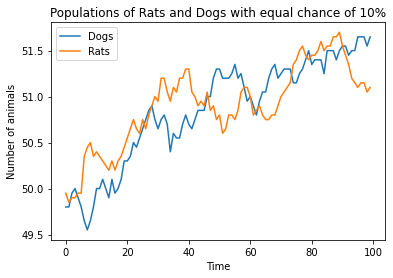

In [12]:
animal_simulation(90,90,90,90,50,50,100)

1.5 Mixing up the parameters.

With equal chances the populations among both species stabilise.

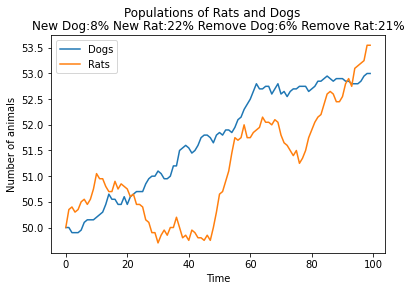

In [14]:
animal_simulation(92,78,94,79,50,50,100)

With similar add and remove rates for each species, the populations slowly increase.

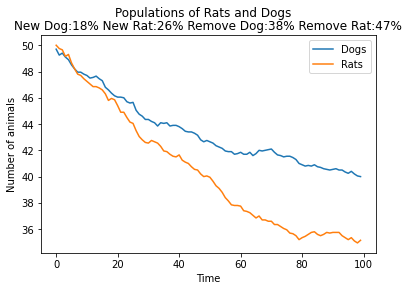

In [15]:
animal_simulation(82,74,62,53,50,50,100)

With high removal rates the populations slowly decrease.

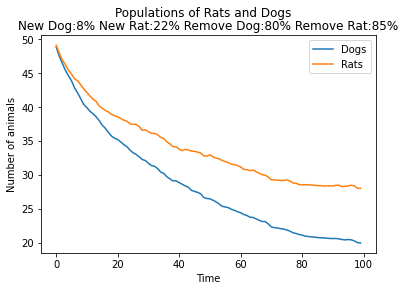

In [16]:
animal_simulation(92,78,20,15,50,50,100)

As expected with very high removal rates the population decreases rapidly.

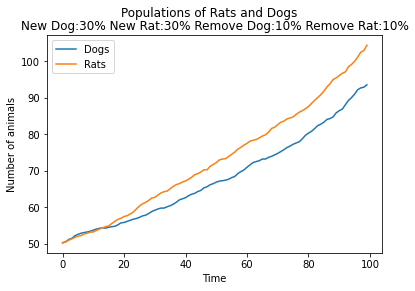

In [17]:
animal_simulation(70,70,90,90,50,50,100)

With higher addition rates than removal rates the populations grow rapidly.

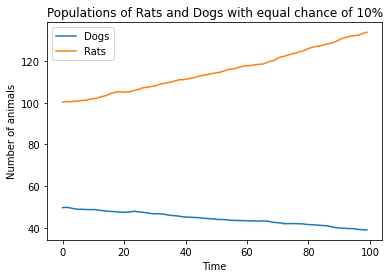

In [18]:
animal_simulation(90,90,90,90,100,50,100)

Different populations sizes with the same parameters result in the higher population species growing and the smaller decreasing.

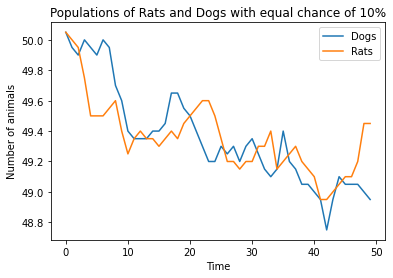

In [19]:
animal_simulation(90,90,90,90,50,50,50)

With a halved step(time) size the results are very similar, giving the assumption that the model is accuracte.  

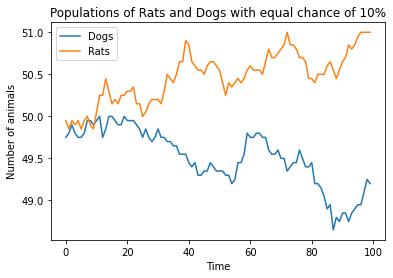

In [20]:
animal_simulation(90,90,90,90,50,50,100)

Regarding stability, if we repeat the first simulation the results consistant with some mild variation.

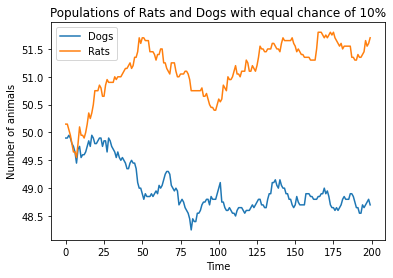

In [22]:
animal_simulation(90,90,90,90,50,50,200)

If the step size is doubled there is some initial variation expected of the model, the populations normalize after time.

Giving the conclusion that the model is stable.

## PART 2

In [65]:
class User:
    def __init__(self,id):
        self.fers = []
        #list of followers
        self.fing = []
        #list of following
        self.feed = []
        #list of posts in feed
        self.id = id
    def popularity(self,network):
        connections = len(network.connections)
        nfollowers = len(self.fers)
        pi = nfollowers/connections
        ##This function returns the weighted probability of getting~ 
        ##~ chosen for an action based on popularity
        return pi    
    def tweet(self,network):
        for fer in self.fers:
            fer.feed.append(self.id)
        network.unique_messages+=1
        #posts to follower's feeds
        return
    def retweet(self):
        latest = self.feed[-1]
        for i in self.fers:
            i.feed.append(latest)
        #reposts from own feed to followers feeds
        return
    def get_followers(self):
        return len(self.fers)
    def get_following(self):
        return len(self.fing)
class Network:
    def __init__(self,n):
        ranger = np.arange(0,n+1,1)
        self.users = [User(ran) for ran in ranger]
        ## Initialises "n" users for network
        self.connections = []
        #keeps trak of all connections so none repeat
        self.unique_messages = 0
        #keeps trak of unique posts
    def follow(self,do,receive):
        key = (str(do.id)+':'+str(receive.id))
        if key not in self.connections:
            do.fing.append(receive)
            receive.fers.append(do)
            self.connections.append(key)
        #follows another user and records connection
        else: 
            return
    def initiate_adds(self):
        for i in (self.users):
            followeed = random.choices(self.users)
            followee = followeed[0]
            followerd = random.choices(self.users)
        #initiates all initial connections
            follower = followerd[0]
            self.follow(i,followee)
            self.follow(follower,i)
            self.pop_follow(i)
    def pop_follow(self,do):
        popchoices = []
        for p in self.users:
            popchoices.append(p.popularity(self))
        #randomly followers a user based on popularity weights
        userarray = self.users
        chosend = random.choices(userarray,popchoices)
        chosen = chosend[0]
        self.follow(do,chosen)
    def step(self,u):
        useri = random.choices(self.users)
        user = useri[0]
        # picks a random user that then tweets or retweets~
        #~ based on weighted probability
        ufeed = user.feed
        if len(ufeed)<=0:
            user.tweet(self)
        else:
            chosen = random.choices(['t','rt'], weights = [u,1-u])
            if chosen == "t":
                user.tweet(self)
            else:
                user.retweet()
        return
    def clear_history(self):
        # clears all feed history 
        for user in self.users:
            user.feed = []

In [66]:
n_users = 100
thefacebook = Network(n_users)
thefacebook.initiate_adds()



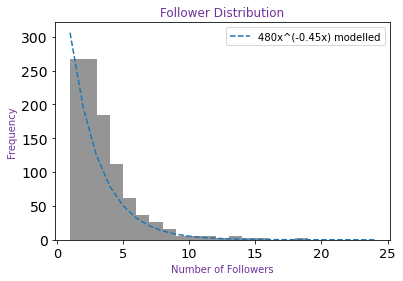

In [67]:
### assuming there is no max feed length and users can see their whole feed
n_users = 1000
thefacebook = Network(n_users)
thefacebook.initiate_adds()

fler = []
for i in thefacebook.users:
    fler.append(i.get_followers())
plt.hist(fler, bins=range(min(fler), max(fler) + 1, 1),color='dimgrey',alpha=0.7)
plt.xlabel('Number of Followers',color='indigo',alpha=0.8)
plt.ylabel('Frequency',color='indigo',alpha=0.8)
plt.title('Follower Distribution',color='indigo',alpha=0.8)
plt.xticks(size = 13)
plt.yticks(size = 14)

xe = np.arange(1,25,1)
xep = 480*np.exp(-0.45*xe)
plt.plot(xe,xep,'--',label='480x^(-0.45x) modelled')
plt.legend()



2.1) With 100 users in this directed network, one can observe an exponential probability distribution as the form of the equation is -> f(x) = Ae^(lx) 

In [68]:
fatlist = []
reruns = 50
for i in range(reruns):
    n_users = 100
    thefacebook = Network(n_users)
    thefacebook.initiate_adds()
    nsteps = 1000
    tlist = np.arange(0,nsteps,1)
    utweets = []
    for i in range(nsteps):
        thefacebook.step(0.1)
        utweets.append(thefacebook.unique_messages)
    fatlist.append(utweets)
fatvec = np.ones([len(fatlist),len(fatlist[0])])
for i in range(len(fatlist)):
    fatvec[i]=fatlist[i]
avvec = np.mean(fatvec, axis = 0)
### here I simulate the tweeting and average it over a large amount of users so i can more`
### accurately produce a model to compare with the real life data later on

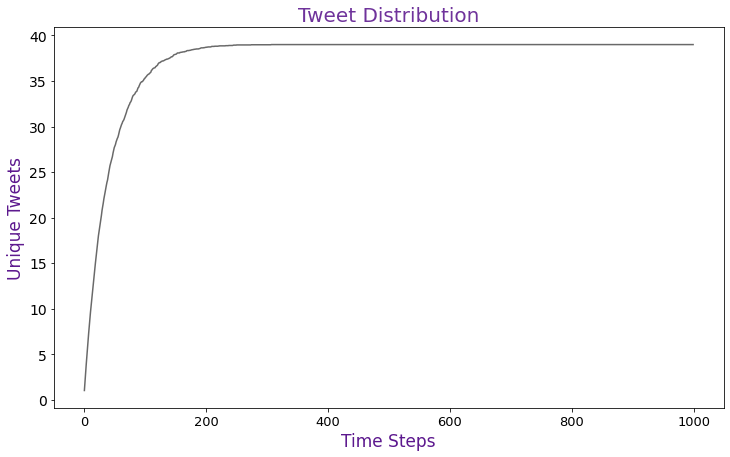

In [69]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.xlabel('Time Steps',color='indigo',alpha=0.9,size = 17)
plt.ylabel('Unique Tweets',color='indigo',alpha=0.9,size = 17)
plt.title('Tweet Distribution',color='indigo',alpha=0.8,size = 20)
plt.xticks(size = 13)
plt.yticks(size = 14)
plt.plot(tlist,avvec,color='dimgrey')
### as more users tweet, more feeds are filled with other people tweets and the likely hood of tweeting
## ~ eventually becomes 0.1 for everyone

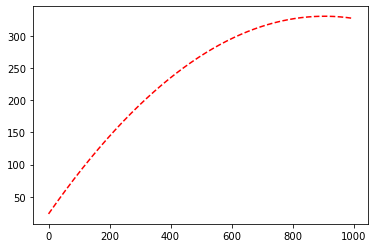

In [70]:
# here I calculate a curve based on a simulation involving 1000 users to more accurately represent the real data
## which involes much more than 100 users
fatlist = []
reruns = 50
for i in range(reruns):
    n_users = 1000
    thefacebook = Network(n_users)
    thefacebook.initiate_adds()
    nsteps = 1000
    tlist = np.arange(0,nsteps,1)
    utweets = []
    for i in range(nsteps):
        thefacebook.step(0.1)
        utweets.append(thefacebook.unique_messages)
    fatlist.append(utweets)
fatvec = np.ones([len(fatlist),len(fatlist[0])])
for i in range(len(fatlist)):
    fatvec[i]=fatlist[i]
avvec = np.mean(fatvec, axis = 0)
def objective(x, a, b, c):
    return a * x + b * x**2 + c
x,y = tlist,avvec
popt, _ = curve_fit(objective, x, y)
a, b, c = popt
x_line = np.arange(min(x), max(x), 1)
y_line = objective(x_line, a, b, c)
plt.plot(x_line, y_line, '--', color='red')
plt.show()
## here I caluclate an approximation function for later comparison

In [71]:
### now I process the real data
wd = os.getcwd()
files = glob.glob(os.path.join( "*.csv"))
datelist = []
dflist = []
for i in files:
    df = pd.read_csv(i,header =None)
    name = i.split("\\")[-1]
    idatetime = name[-14:-4]
    idatetime = idatetime.lstrip("_")
    idatetime = idatetime.lstrip("s_")
    datelist.append(idatetime)
    dflist.append(df.copy())
idates = [dt.datetime.strptime(str(date),"%Y_%m_%d") for date in datelist]
## I convert the date data to a useable format
imdates = []
for i in idates:
    q = mdates.date2num(i)
    imdates.append(q)
for i in dflist:
    i.columns = ["frequency","hashtags"]

In [72]:
hashlist = []
# list of total hashtags per day
for i in dflist:
    q = np.array(i["frequency"])
    hashlist.append(np.sum(q))
hashamount = []
#list of number of unique tweets each day
for i in dflist:
    q = np.array(i["frequency"])
    hashamount.append(len(q))

Text(0.5, 1.0, 'Actual Number of Twitter Tweets')

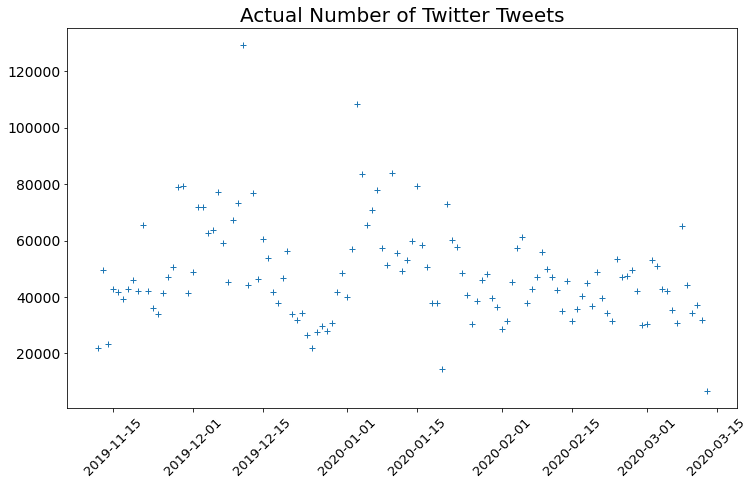

In [73]:
### Here I plot the total number of tweets per day
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot_date(imdates, hashlist, marker = '+')
plt.xticks(rotation = 45,size = 13)
plt.yticks(size = 14)
plt.title("Actual Number of Twitter Tweets",size = "20")


Above behavior seems to wax and wane in somewhat of a continous fashion, peaking in specific spots, likely centred around big events such as the bushfires, outliers cana be observed, these were likely on days of outstanding tragedy 

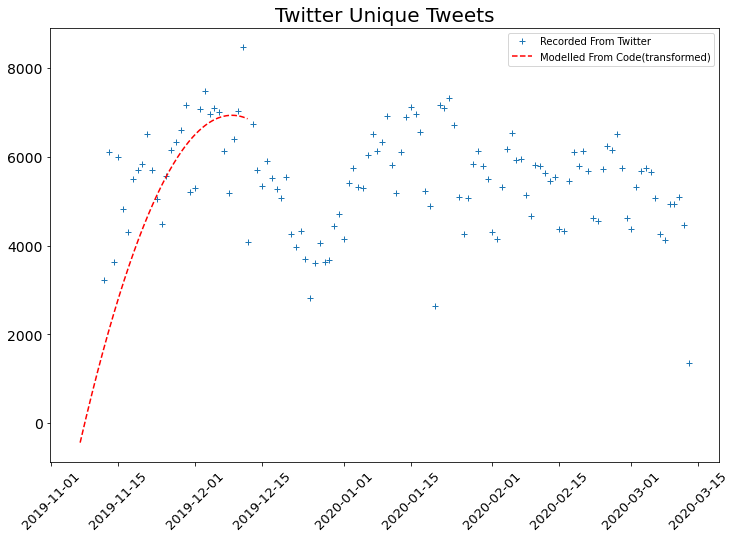

In [74]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot_date(idates, hashamount, marker = '+',label= 'Recorded From Twitter')
plt.xticks(rotation = 45,size = 13)
plt.yticks(size = 14)
plt.title("Twitter Unique Tweets",size = "20")
plt.plot(0.035*x_line+imdates[0]-5, y_line*24-1000, '--', color='red',label = 'Modelled From Code(transformed)'
        )
plt.legend()
plt.show()

2.3 )    Here I transposed my model over the real data to make a more direct comparison. Clearly in the two plots there seems to be some strong correlation but the relevancy is definately in question because the real data that was recorded is plotted to task as the "different types of hashtags used PER DAY" and the modeled data represents "the number of unique messages CURRENTLY IN THE NETWORK " in total. However, one could argue the two models are similar enough to make some sort of valuable comparison. However, for a more complete model the representation would be altered and more iterations of the network simulation would have to be ran while also implementing event incentives to increase likelyhood of tweeting on certain days.